# Regression Exploration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## Exercises
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

#### 1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

#### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
import wrangle
import prepare

In [3]:
df = wrangle.get_zillow()

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [5]:
df = wrangle.wrangle_zillow(df)

In [6]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county
4,4,2.0,3633.0,296425.0,2005,6941.39,los_angeles
6,3,4.0,1620.0,847770.0,2011,10244.94,los_angeles
7,3,2.0,2077.0,646760.0,1926,7924.68,los_angeles
18,3,1.0,1244.0,169471.0,1950,2532.88,los_angeles
19,3,2.0,1300.0,233266.0,1950,3110.99,los_angeles


In [7]:
train, validate, test = prepare.split_zillow(df)

In [8]:
train.shape, validate.shape, test.shape

((1158312, 7), (496420, 7), (413683, 7))

In [9]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county
492481,3,2.0,1268.0,432248.0,1954,4952.88,orange
108997,3,3.0,2513.0,729073.0,1941,6713.37,los_angeles
1787613,3,2.0,1365.0,76175.0,1969,878.72,ventura
953750,3,2.0,1513.0,730050.0,1955,8822.58,los_angeles
1302574,5,5.0,3834.0,900000.0,2002,11042.00,los_angeles


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1158312 entries, 492481 to 2102541
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1158312 non-null  uint8  
 1   bathroomcnt                   1158312 non-null  float16
 2   calculatedfinishedsquarefeet  1158312 non-null  float64
 3   taxvaluedollarcnt             1158312 non-null  float64
 4   yearbuilt                     1158312 non-null  uint16 
 5   taxamount                     1158312 non-null  float64
 6   county                        1158312 non-null  object 
dtypes: float16(1), float64(3), object(1), uint16(1), uint8(1)
memory usage: 49.7+ MB


#### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [12]:
# Since train is so large, I've decided to take a 10% random sample to speed up the plotting using my plot_variable_pairs 
# function
sample = train.sample(n=len(train)//10)
sample.shape

(115831, 7)

In [13]:
from itertools import combinations

def plot_variable_pairs(df, to_drop = None):
    '''
    This function takes in a dataframe and plots all possible numerical data pairs in scatterplots with a regression 
    line. The function only plots unique combinations of pairs, not permutations, e.g. only prints column a by 
    column b, but leaves out column b by column a. This reduces clutter and runtime.
    
    arguments: df - A dataframe with numerical columns
               to_drop - a list of columns to drop or not include in the plots
    returns: This function returns nothing; it merely plots out the scatterplots
    '''
    
    if to_drop == None:
        columns_to_plot = df.select_dtypes(include = 'number').columns
        plot_tuples = []
        for i in combinations(columns_to_plot,2):
            plot_tuples.append(i)

        for i in plot_tuples:
            sns.lmplot(x = i[0], y = i[1], data = df, line_kws={'color': '#FF5E13', 'linewidth': 3},  height=5, aspect=1.5)
            plt.show()
    else:
        columns_to_plot = df.select_dtypes(include = 'number').columns.drop(to_drop)
        plot_tuples = []
        for i in combinations(columns_to_plot,2):
            plot_tuples.append(i)

        for i in plot_tuples:
            sns.lmplot(x = i[0], y = i[1], data = df, line_kws={'color': '#FF5E13', 'linewidth': 3},  height=5, aspect=1.5)
            plt.show()
            

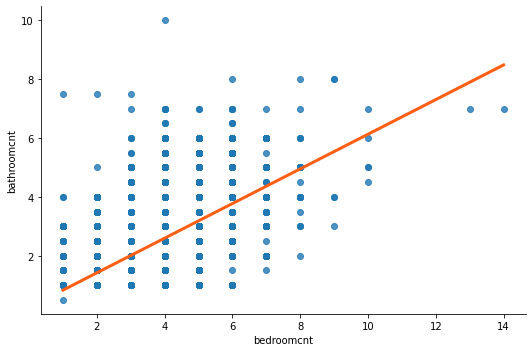

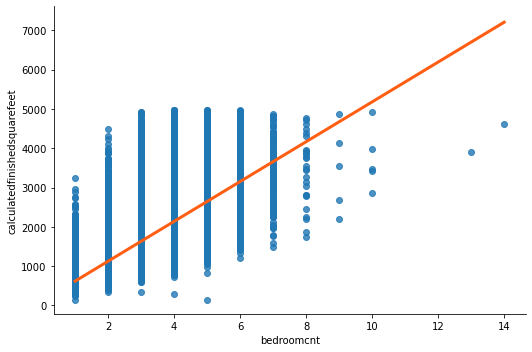

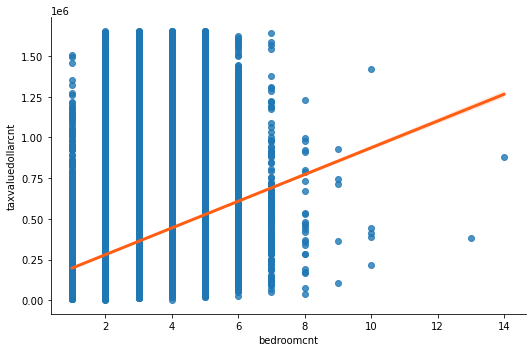

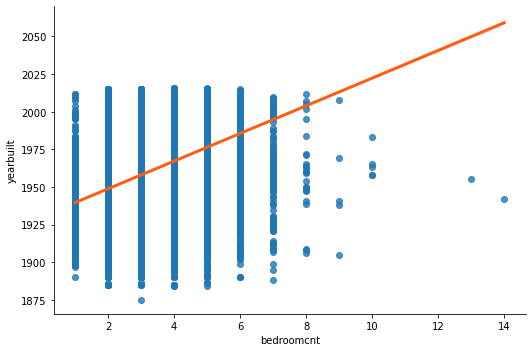

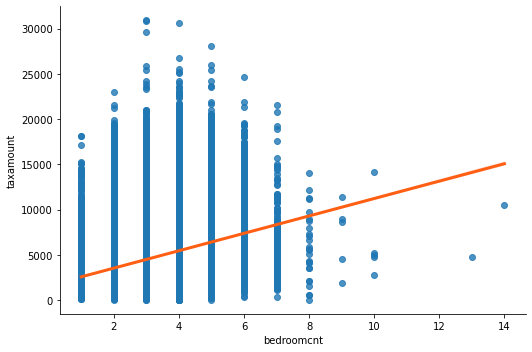

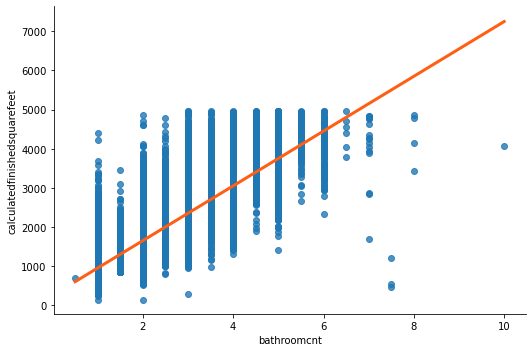

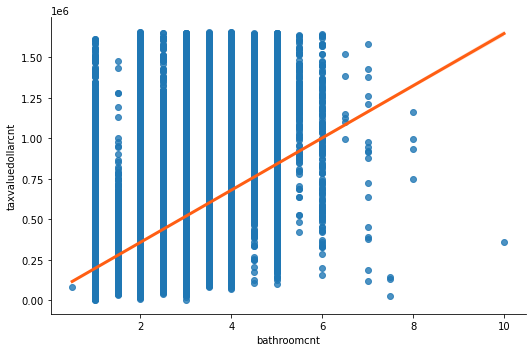

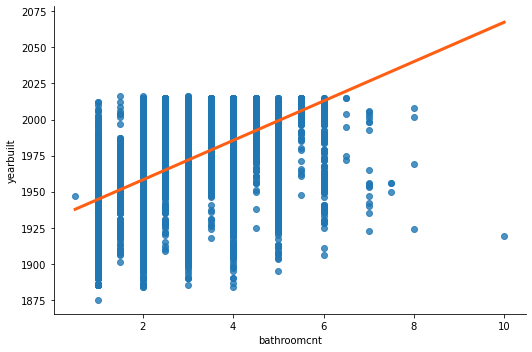

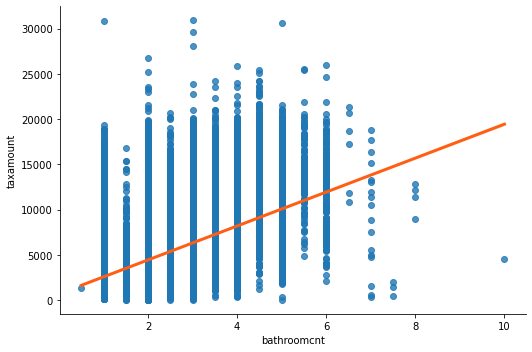

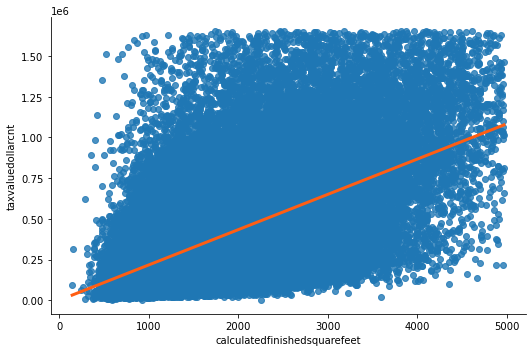

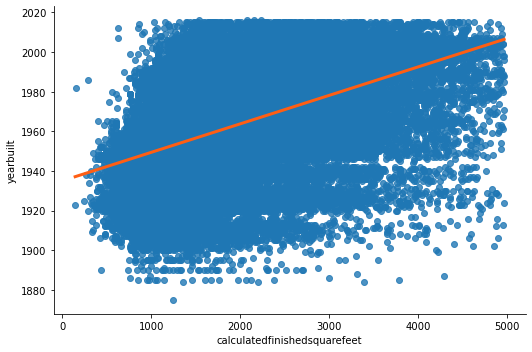

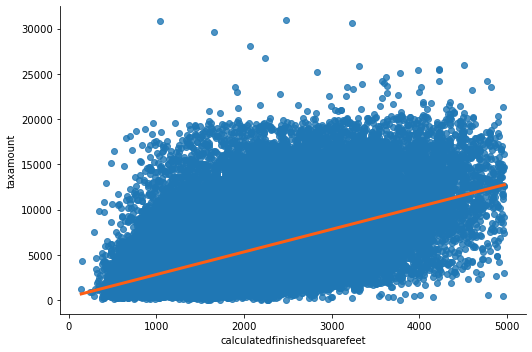

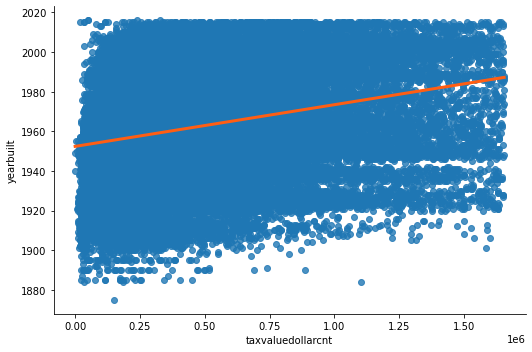

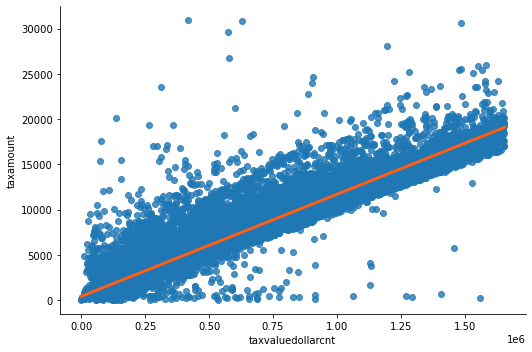

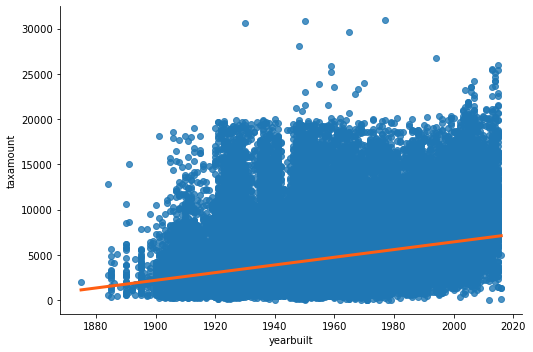

In [14]:
plot_variable_pairs(sample)

#### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



In [15]:
def plot_categorical_and_continuous_vars(df, continuous, categorical):
    '''
    This function takes in a dataframe, a list of continuous variables, and a list of categorical variables and does 
    3 plots for each unique combination of categorical and continuous variable.
    
    Arguments: df - a dataframe consisting of continuous and categorical columns
    '''
    plot_list = []
    for cat in categorical:
        for cont in continuous:
            plot_list.append([cat, cont])
    
    for i in plot_list:
        plt.figure(figsize=(18, 5))
        plt.subplot(131)
        sns.boxplot(x=i[0], y=i[1], data=df)
#         sns.histplot(data = df, x = i[1], hue = 'county', element = 'step', bins =20)
        plt.subplot(132)
        sns.stripplot(x=i[0], y=i[1], data=df)
        plt.subplot(133)
        sns.violinplot(x=i[0], y=i[1], data=df)
#         sns.barplot(x=i[0], y=i[1], data=df)
        plt.show()

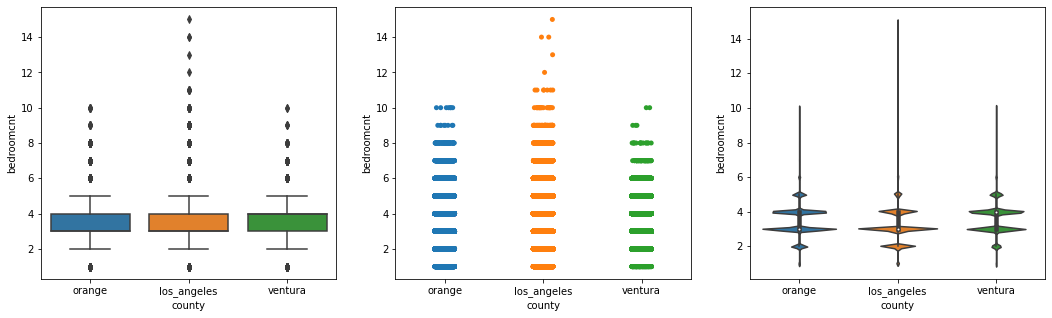

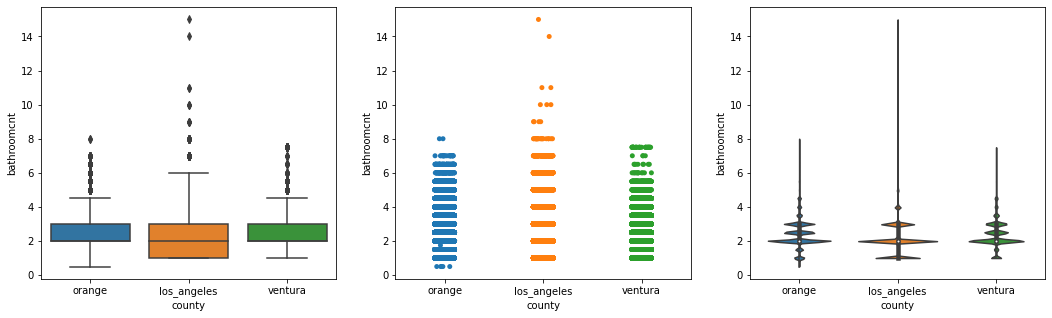

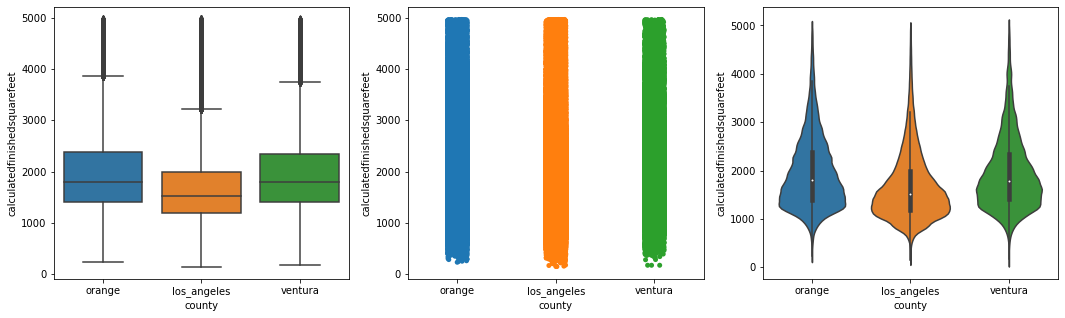

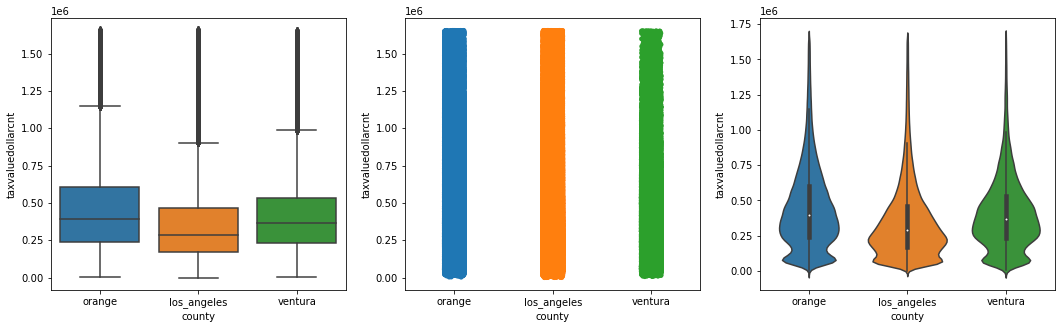

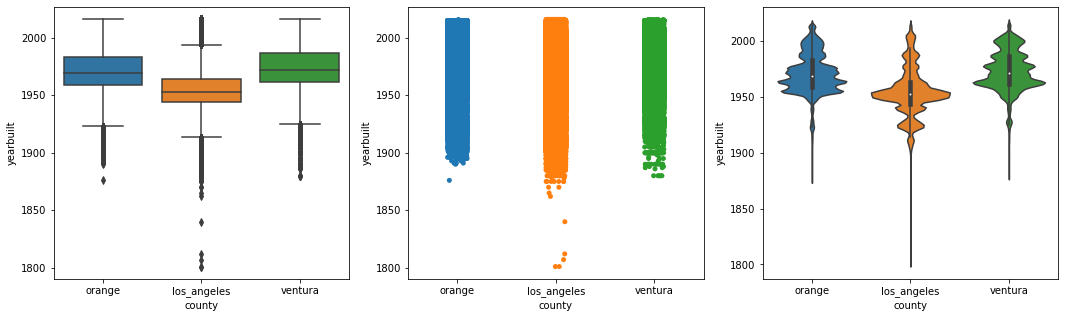

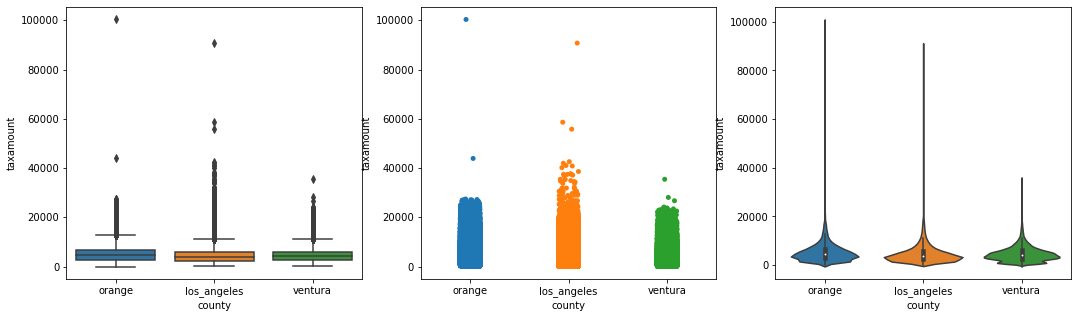

In [16]:
plot_categorical_and_continuous_vars(train, df.select_dtypes(include = 'number').columns,['county'])


#### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Done

#### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

Done, see above

#### 7. Come up with some initial hypotheses based on your goal of predicting property value.

**Hypotheses:**
1. Homes in Orange County have a higher taxvaluedollarcnt average than Los Angeles County and Ventura county

2. Taxamount will tightly correlate with taxvaluedollarcnt

3. As calculatedfinishedsquarefeet increases so will taxvaluedollarcnt that is to say they are highly correlated.

4. Newer homes will have a higher taxvaluedollarcnt. There will be a correlation between yearbuilt and taxvaluedollarcnt.

#### 8. Visualize all combinations of variables in some way.

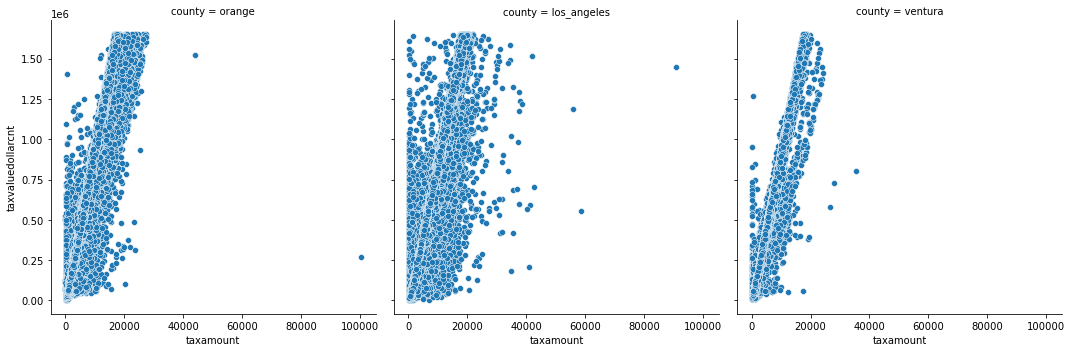

In [17]:
sns.relplot(x="taxamount", y="taxvaluedollarcnt", data=train,  kind='scatter', height=5, col='county')
plt.show()

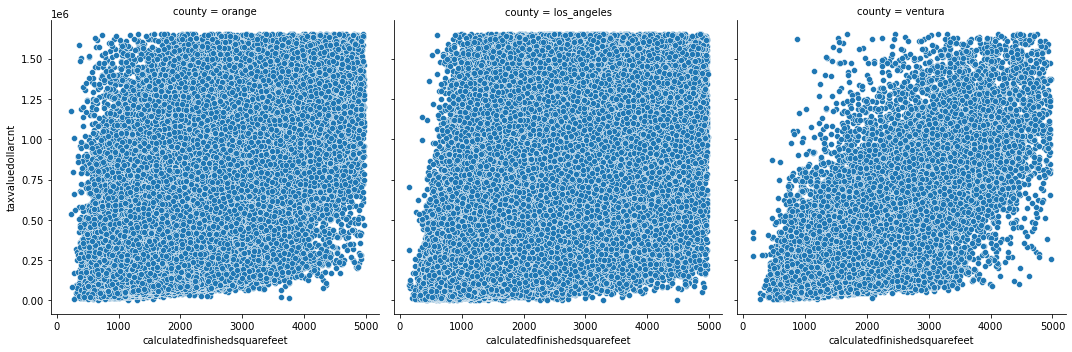

In [18]:
sns.relplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt", data=train,  kind='scatter', height=5, col='county')
plt.show()

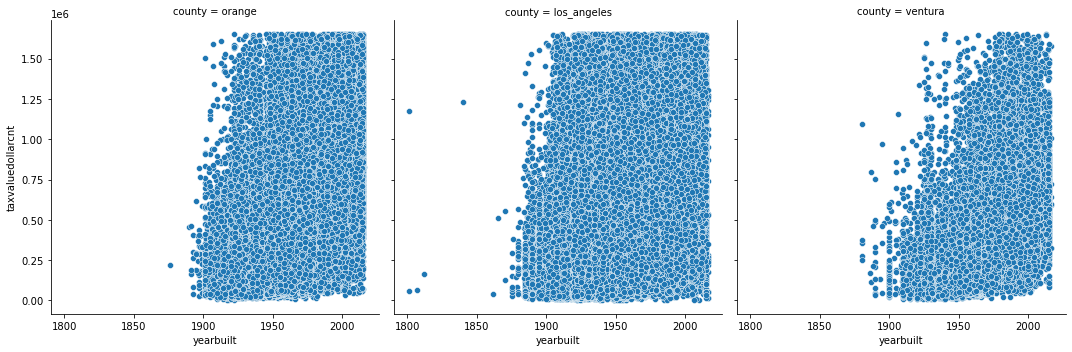

In [19]:
sns.relplot(x="yearbuilt", y="taxvaluedollarcnt", data=train,  kind='scatter', height=5, col='county')
plt.show()

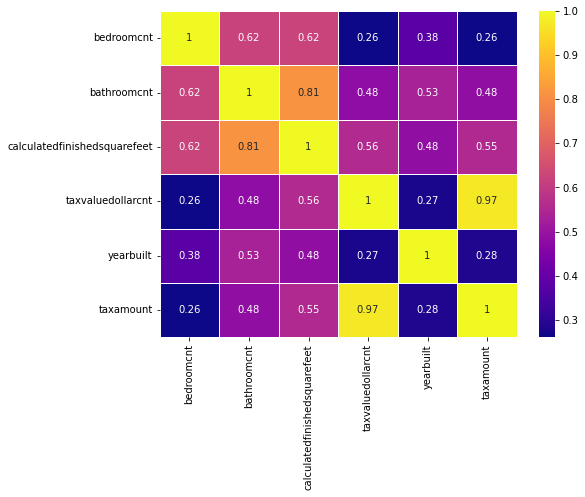

In [20]:
train_corr = train.drop(columns=['county']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(train_corr, cmap='plasma', annot=True, linewidth=0.5)

plt.show()

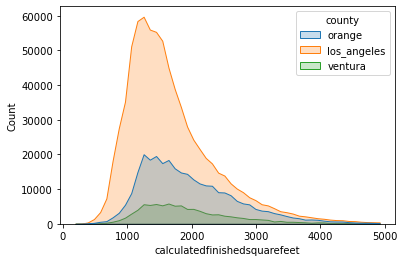

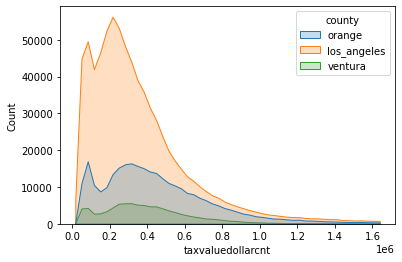

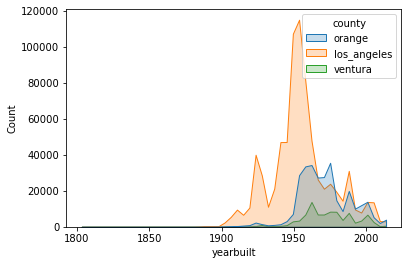

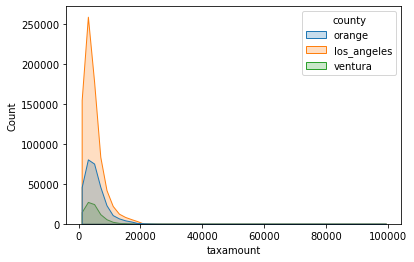

In [21]:
# Visualizing the continuous numerical data as counts over 50 bins, split by county

for element in train.select_dtypes('number').columns.drop(['bedroomcnt', 'bathroomcnt']):
#     plt.figure(figsize=(12,4))
#     plt.subplot(131)
#     sns.histplot(data = train, x=element, hue='county', element='step', bins = 50)
#     plt.subplot(132)
#     sns.histplot(data = train, x=element, hue='county', element= 'bars', bins = 50)
#     plt.subplot(133)
    sns.histplot(data = train, x=element, hue='county', element= 'poly', bins = 50)
    plt.show()

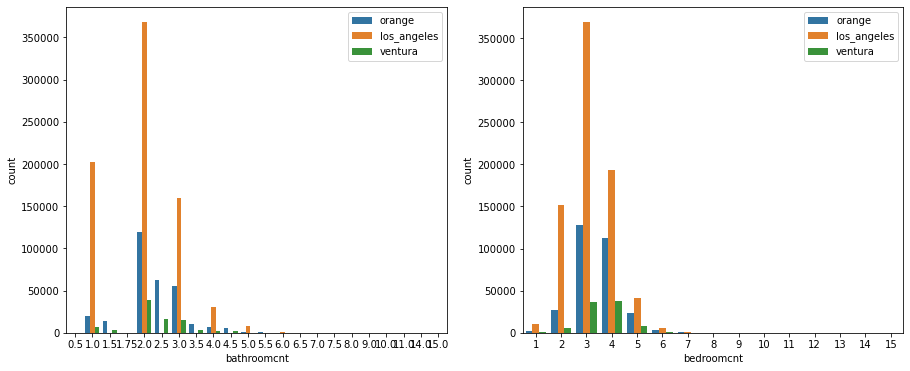

In [22]:
# Visualizing the discrete numerical data as counts split by county
plt.figure(figsize=(15, 6))
plt.subplot(121)
sns.countplot(data=train, x= 'bathroomcnt', hue = 'county')
plt.legend(loc='upper right')
plt.subplot(122)
sns.countplot(data=train, x= 'bedroomcnt', hue = 'county')
plt.legend(loc='upper right')
plt.show()

#### 9. Run the appropriate statistical tests where needed.

In [23]:
import scipy.stats as stats

#### Hypotheses


##### Hypothesis 1:

$H_{0}$ Homes in Orange County have a lower or equal taxvaluedollarcnt than Los Angeles County and Ventura county

$H_{a}$ Homes in Orange County have a higher taxvaluedollarcnt than Los Angeles County and Ventura county


In [28]:
# Setting variables
alpha = .05

orange = train[train.county == 'orange']
la_and_ventura = train[(train.county == 'los_angeles') | (train.county == 'ventura')]

In [26]:
# Checking for variance with levene

stats.levene(orange.taxvaluedollarcnt, la_and_ventura.taxvaluedollarcnt)
# No equal variance for these two groups

LeveneResult(statistic=4875.975920518482, pvalue=0.0)

In [29]:
t, p = stats.ttest_ind(orange.taxvaluedollarcnt, la_and_ventura.taxvaluedollarcnt, equal_var=False)

(p/2) < alpha

True

In [30]:
t

143.3121207469114

Because p/2 is less than alpha and the t value is positive, I can reject the null hypothesis. Homes in Orange County have a higher taxvaluedollarcnt than homes in Los Angeles County and Ventura County.

##### Hypothesis 2 

$H_{0}$ There is no linear correlation between taxamount and taxvaluedollarcnt

$H_{a}$ There is a linear correlation between taxamount and taxvaluedollarcnt


In [66]:
corr, p = stats.pearsonr(train.taxamount, train.taxvaluedollarcnt)
p < alpha

True

In [67]:
corr, p

(0.9722130569460881, 0.0)

I reject the null hypothesis.  There is a statistically significant linear correlation between taxamount and taxvaluedollarcnt that is extremely strong with an r value of 0.9722.

##### Hypothesis 3

$H_{0}$ There is no linear correlation between calculatedfinishedsquarefeet and taxvaluedollarcnt.

$H_{a}$ There is a linear correlation between calculatedfinishedsquarefeet and taxvaluedollarcnt.

In [34]:
corr, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.taxvaluedollarcnt)
p < alpha

True

In [35]:
corr, p

(0.5571905345033548, 0.0)

I reject the null hypothesis. There is a statistically significant linear correlation between calculatedfinishedsquarefeet and taxvaluedollarcnt; this relationship is moderately strong with an r value of .5572.

##### Hypothesis 4

$H_{0}$ There is no linear correlation between yearbuilt and taxvaluedollarcnt.

$H_{a}$ There is a linear correlation between yearbuilt and taxvaluedollarcnt.

In [37]:
corr, p = stats.pearsonr(train.yearbuilt, train.taxvaluedollarcnt)
p < alpha

True

In [38]:
corr, p

(0.2746157590863208, 0.0)

I reject the null hypothesis. There is a statistically significant linear correlation between yearbuilt and taxvaluedollarcnt; this relationship while existant is not very strong with an r value of .2746.

##### 10. What independent variables are correlated with the dependent variable, home value?

As seen in the heatmap as well as the pearsonr correlation tests above both calculatedfinishedsquarefeet and taxamount have r values that are above .5 and both are statistically significant.  Further, taxamount is correlated at .97 which is extremely tight.

##### 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

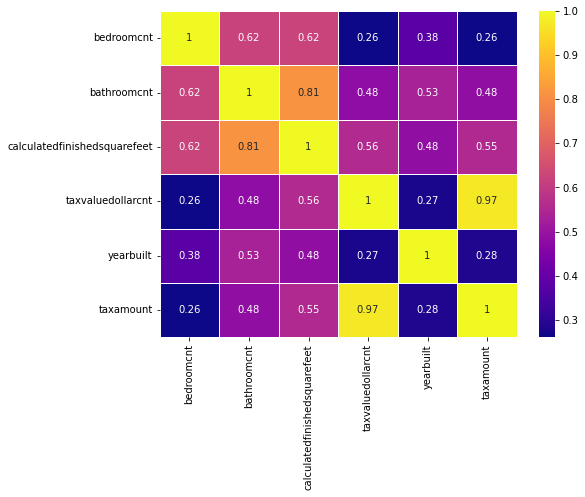

In [42]:
train_corr = train.drop(columns=['county']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(train_corr, cmap='plasma', annot=True, linewidth=0.5)

plt.show()

As seen in the heatmap above the following values are correlated with an r value greater .5
- bedroomcnt and bathroomcnt: r value of .62
- bedroomcnt and calculatedfinishedsquarefeet: r value of .62

- bathroomcnt and calculatedfinishedsquarefeet: r value of .81
- bathroomcnt and yearbuilt: r value of .81

- calculatedfinishedsquarefeet and taxamount: r value of .55

##### 13. Explore your dataset with any other visualizations you think will be helpful.

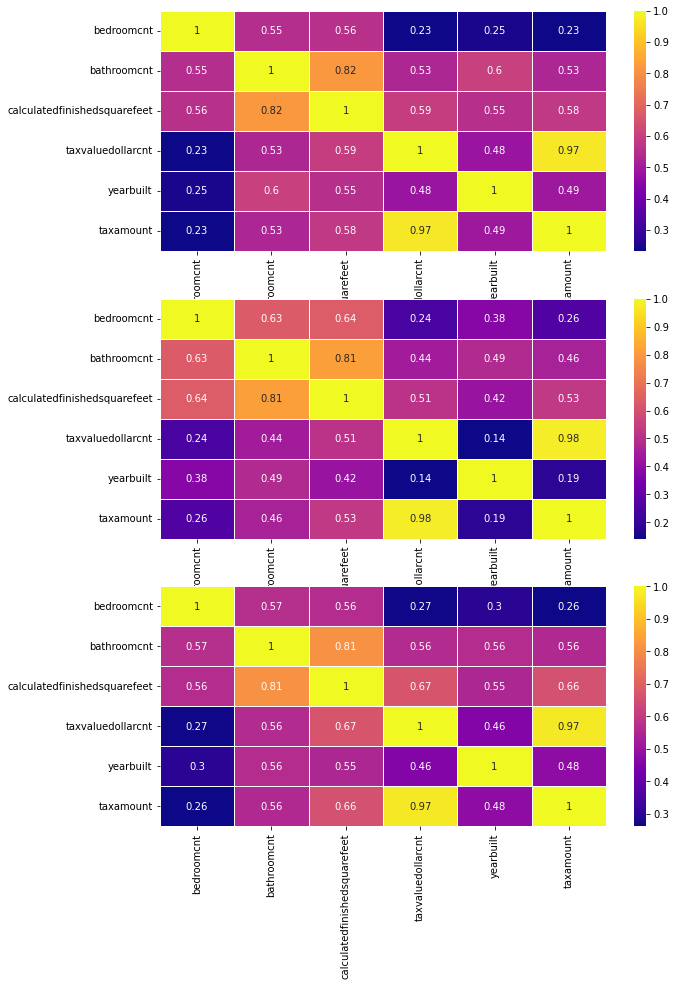

In [64]:
plt.figure(figsize=(10,15))

plt.subplot(311)
orange_corr = train[train.county == 'orange']
orange_corr = orange_corr.drop(columns=['county']).corr()
sns.heatmap(orange_corr, cmap='plasma', annot=True, linewidth=0.5)

plt.subplot(312)
la_corr = train[train.county == 'los_angeles']
la_corr = la_corr.drop(columns=['county']).corr()
sns.heatmap(la_corr, cmap='plasma', annot=True, linewidth=0.5)

plt.subplot(313)
ventura_corr = train[train.county == 'ventura']
ventura_corr = ventura_corr.drop(columns=['county']).corr()
sns.heatmap(ventura_corr, cmap='plasma', annot=True, linewidth=0.5)
plt.show()